In [94]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alexandreminy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alexandreminy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
df = open('results.txt', encoding="utf-8")

In [60]:
raw = df.read()

In [64]:
tokens = nltk.word_tokenize(raw)
words = [w.lower() for w in tokens]

In [66]:
words

['about',
 'you',
 '💪master',
 '’',
 's',
 'degree',
 '(',
 'on-going',
 ')',
 'in',
 'a',
 'quantitative',
 'or',
 'business',
 'field',
 '(',
 'statistics',
 ',',
 'mathematics',
 ',',
 'econometrics',
 ',',
 'economics',
 ',',
 'finance',
 ',',
 'etc',
 '.',
 ')',
 'knowledge',
 'of',
 'reporting',
 'software',
 '(',
 'tableau',
 ')',
 'requiredtechnical',
 'knowledge',
 'in',
 'sql',
 ',',
 'r',
 ',',
 'python',
 'and',
 'other',
 'programming',
 'languages',
 'is',
 'a',
 'plusyou',
 'are',
 'fluent',
 'in',
 'englishyou',
 'can',
 'demonstrate',
 'your',
 'ability',
 'to',
 'solve',
 'problems',
 'end',
 'to',
 'endability',
 'to',
 'present',
 'results',
 'to',
 'both',
 'technical',
 'and',
 'non-technical',
 'audiencesyou',
 'have',
 'a',
 'real',
 'interest',
 'in',
 'online',
 'advertising',
 'market',
 'and',
 'the',
 'impact',
 'of',
 'a',
 'high-performance',
 'technology',
 'in',
 'this',
 'marketcurious',
 ',',
 'daring',
 ',',
 'dynamic',
 'and',
 'versatile',
 'person

In [69]:
# deleting all specific caracters
characters_to_remove = ["@", "/", "#", ".", ",", "!", "?", "(", ")", "-", "_","’","'", "\"", ":", " "]
transformation_dict = {initial:" " for initial in characters_to_remove}
no_punctuation_reviews = [word.translate(str.maketrans(transformation_dict)) for word in words]



In [70]:
no_punctuation_reviews

['about',
 'you',
 '💪master',
 ' ',
 's',
 'degree',
 ' ',
 'on going',
 ' ',
 'in',
 'a',
 'quantitative',
 'or',
 'business',
 'field',
 ' ',
 'statistics',
 ' ',
 'mathematics',
 ' ',
 'econometrics',
 ' ',
 'economics',
 ' ',
 'finance',
 ' ',
 'etc',
 ' ',
 ' ',
 'knowledge',
 'of',
 'reporting',
 'software',
 ' ',
 'tableau',
 ' ',
 'requiredtechnical',
 'knowledge',
 'in',
 'sql',
 ' ',
 'r',
 ' ',
 'python',
 'and',
 'other',
 'programming',
 'languages',
 'is',
 'a',
 'plusyou',
 'are',
 'fluent',
 'in',
 'englishyou',
 'can',
 'demonstrate',
 'your',
 'ability',
 'to',
 'solve',
 'problems',
 'end',
 'to',
 'endability',
 'to',
 'present',
 'results',
 'to',
 'both',
 'technical',
 'and',
 'non technical',
 'audiencesyou',
 'have',
 'a',
 'real',
 'interest',
 'in',
 'online',
 'advertising',
 'market',
 'and',
 'the',
 'impact',
 'of',
 'a',
 'high performance',
 'technology',
 'in',
 'this',
 'marketcurious',
 ' ',
 'daring',
 ' ',
 'dynamic',
 'and',
 'versatile',
 'person

In [71]:
# removing accent
with_accent = ['é', 'è', 'ê', 'à', 'ù', 'ç', 'ô', 'î']
without_accent = ['e', 'e', 'e', 'a', 'u', 'c', 'o', 'i']
transformation_dict = {before:after for before, after in zip(with_accent, without_accent)}
no_accent_reviews = [review.translate(str.maketrans(transformation_dict)) for review in no_punctuation_reviews]


In [111]:
stopW = stopwords.words('french')
stopW += stopwords.words('english')
stopW.append('plus')
stopword_reviews = [token for token in no_accent_reviews if token not in stopW]

filtered_words = [] 
  
for w in no_accent_reviews: 
    if w not in stopW: 
        filtered_words.append(w) 

In [112]:
long_words = []
for w in filtered_words: 
    if len(w)>2:
        long_words.append(w) 

In [113]:
def plot_frequent_words(list_of_words):    
    dist = nltk.FreqDist(list_of_words)
    X = [nb[1] for nb in dist.most_common(20)]
    y = [nb[0] for nb in dist.most_common(20)]
    ax = sns.barplot(X,y)
    ax.set(xlabel='Word frequencies',ylabel='Words',title='Most common words in the corpus')
    plt.show()

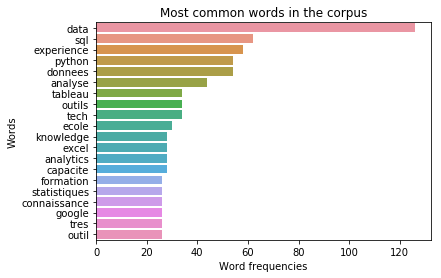

6162


In [114]:
# And making it with our current data

plot_frequent_words(long_words)
print(len(long_words))

# Word Cloud

In [115]:
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt

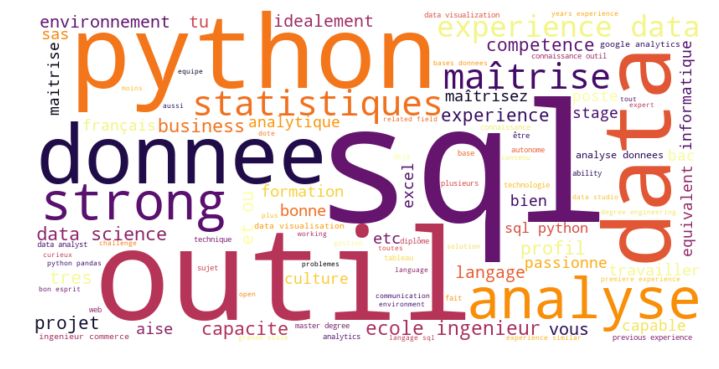

In [116]:
wordcloud = WordCloud(height=400, width=800, background_color="white", colormap='inferno', max_words=100)

wc_words = ' '
for word in long_words:
    wc_words = wc_words + word + ' '
    
wordcloud.generate(wc_words)

plt.figure(figsize=(12,16))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()